# **Problem Statement**
Implement K-Nearest Neighbors algorithm on diabetes.csv dataset.

Compute confusionmatrix, accuracy, error rate, precision and recall on the given dataset.

Dataset link :
https://www.kaggle.com/datasets/abdallamahgoub/diabetes

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_csv("diabetes.csv")

In [113]:
df.shape

(768, 9)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [115]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [116]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [117]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Implement K-Nearest Neighbors algorithm on diabetes.csv dataset

1. Split the data into features and target dataframes

In [118]:
# select only the target variable Outcome' and store it in dataframe 'y'
y = pd.DataFrame(df['Outcome'])

In [119]:
# use 'drop()' to remove the variable 'Outcome' from df
x = df.drop('Outcome',axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


2. Split the data into training and test sets.

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

print("The shape of X_train is:",x_train.shape)
print("The shape of X_test is:",x_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (576, 8)
The shape of X_test is: (192, 8)
The shape of y_train is: (576, 1)
The shape of y_test is: (192, 1)


In [121]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
knnclassifier = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
knnclassifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_jobs=-1)

In [122]:
# We predict target values
y_predict = knnclassifier.predict(x_test)
df_1 = {'Actual': y_test, 'Predicted': y_predict}
df_1

{'Actual':      Outcome
 285        0
 101        0
 581        0
 352        0
 726        0
 ..       ...
 247        0
 189        1
 139        0
 518        0
 629        0
 
 [192 rows x 1 columns],
 'Predicted': array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])}

# Compute confusionmatrix, accuracy, error rate, precision and recall on the given dataset.

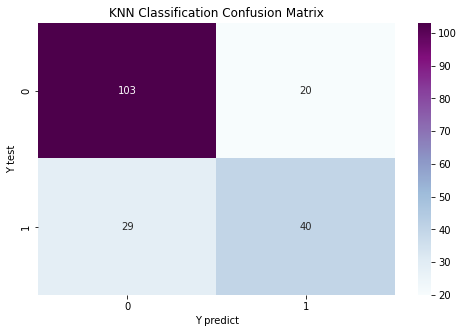

In [123]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

knnclassifier_cm = confusion_matrix(y_test, y_predict)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(knnclassifier_cm, annot=True, fmt='g', ax=ax, cmap="BuPu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [124]:
print('true negatives (TN):  ', knnclassifier_cm[0,0])
print('true positives (TP):  ', knnclassifier_cm[1,1])
print('false positives (FP): ', knnclassifier_cm[0,1])
print('false negative (FN):  ', knnclassifier_cm[1,0])


true negatives (TN):   103
true positives (TP):   40
false positives (FP):  20
false negative (FN):   29


In [125]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Accuracy score: ",accuracy_score(y_test, y_predict).round(2))     # TP+TN/P+N      % of test set tuples that are correctly labelled  as classified
print("Precision score: ",precision_score(y_test, y_predict).round(2))   # TP/TP+FP       measure of exactness
print("Recall score: ", recall_score(y_test, y_predict).round(2))        # TP/FN+FP       measure of completeness
print("F1 score: ", f1_score(y_test, y_predict).round(2))


Accuracy score:  0.74
Precision score:  0.67
Recall score:  0.58
F1 score:  0.62
